[View in Colaboratory](https://colab.research.google.com/github/sdevika/MLBootCamp/blob/master/lab2_partB.ipynb)

## L1 and L2 Penalty and Sparsity in Logistic Regression
Experiment with MNIST digits. Comparison of the sparsity (percentage of zero coefficients) of solutions when L1 and L2 penalty are used for different values of C. We can see that large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more. In the L1 penalty case, this leads to sparser solutions.
We classify 8x8 images of digits into two classes: 0-4 against 5-9. The visualization shows coefficients of the models for varying C.

lambda=  0.01
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9093
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
lambda=  1.0
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
lambda=  100.0
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8609
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


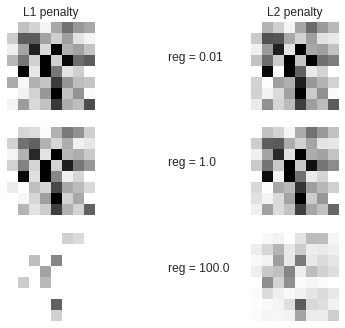

In [1]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print "lambda= ", 1./C
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "reg = " +str(1./C))

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

